<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_6_Customer_Repeat_Order.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kasus 06 : Analisasi Loyalitas Pelanggan di Tokofix
Tokofix adalah sebuah platform e-commerce yang memiliki ribuan pelanggan dari berbagai daerah di Indonesia. Perusahaan ini menjual beragam produk dengan segmentasi pelanggan berdasarkan nilai pesanan mereka, yaitu Low Value, Medium Value, dan High Value. Baru-baru ini, Tokofix ingin memperdalam pemahaman mereka tentang perilaku pelanggan, khususnya dalam hal repeat order (pemesanan ulang) dan risiko churn (potensi pelanggan berhenti berbelanja).

Sebagai bagian dari strategi retensi pelanggan, tim Data Analyst Tokofix mengumpulkan data dari 1.000 pelanggan acak. Data ini mencakup informasi seperti tanggal pemesanan pertama dan terakhir, jumlah total pesanan, nilai rata-rata pesanan, segmentasi pelanggan, wilayah, dan risiko churn. Dengan dataset ini, tim ingin menjawab beberapa pertanyaan penting untuk memperbaiki strategi bisnis mereka.


## Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
file_path = "https://docs.google.com/spreadsheets/d/1OL0XlEvc0bPLzm0xdFxhHLdrA7slnNSP/export?format=csv"

In [40]:
df = pd.read_csv(file_path)
df.head()

,Customer_ID,First_Order_Date,Last_Order_Date,Total_Orders,Average_Order_Value,Is_Repeat_Order_Next_Month,Customer_Segment,Customer_Region,Churn_Risk
0,C0001,2023-04-02,2023-09-21,7,Rp 307.960,0,Low Value,Yogyakarta,Medium
1,C0002,2023-02-07,2023-03-07,4,Rp 704.700,0,Low Value,Bandung,High
2,C0003,2023-08-09,2023-09-08,8,Rp 117.740,0,Medium Value,Bandung,High
3,C0004,2023-03-05,2023-06-17,5,Rp 193.700,0,Medium Value,Surabaya,Medium
4,C0005,2023-07-22,2023-08-28,7,Rp 819.920,1,High Value,Yogyakarta,High


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer_ID                 1000 non-null   object
 1   First_Order_Date            1000 non-null   object
 2   Last_Order_Date             1000 non-null   object
 3   Total_Orders                1000 non-null   int64 
 4   Average_Order_Value         1000 non-null   object
 5   Is_Repeat_Order_Next_Month  1000 non-null   int64 
 6   Customer_Segment            1000 non-null   object
 7   Customer_Region             1000 non-null   object
 8   Churn_Risk                  1000 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [42]:
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

,0
Customer_ID,0
First_Order_Date,0
Last_Order_Date,0
Total_Orders,0
Average_Order_Value,0
Is_Repeat_Order_Next_Month,0
Customer_Segment,0
Customer_Region,0
Churn_Risk,0


## Soal 1
Berdasarkan data pelanggan bulan ini, berapa persen pelanggan yang melakukan repeat order di bulan berikutnya, dan berapa persen yang tidak melakukan repeat order?


### Jawab :

In [44]:
percent_repeat_order = df["Is_Repeat_Order_Next_Month"].value_counts() * 100 / len(df)
percent_repeat_order

,count
Is_Repeat_Order_Next_Month,
0,50.5
1,49.5


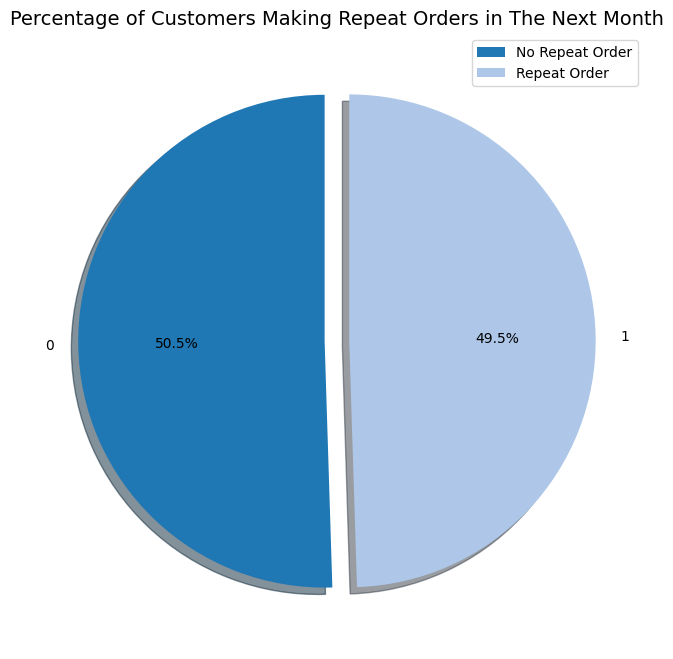

In [45]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
percent_repeat_order.plot.pie(
    autopct='%1.1f%%',  # Menampilkan persentase dengan 1 angka desimal
    startangle=90,      # Memulai dari sudut 90 derajat
    colors=plt.cm.tab20.colors,  # Warna pie chart
    explode=[0.05] * len(percent_repeat_order),  # Memberi efek explode untuk semua segmen
    shadow=True         # Menambahkan bayangan
)

# Menambahkan judul
plt.title("Percentage of Customers Making Repeat Orders in The Next Month", fontsize=14)

# Menampilkan pie chart
plt.ylabel("")
plt.legend(labels=["No Repeat Order", "Repeat Order"])
plt.show()

### Analisis :

1. Pelanggan yang melakukan repeat order (49.5%): Hampir separuh dari pelanggan yang dianalisis melakukan pemesanan ulang pada bulan berikutnya setelah melakukan pesanan pertama. Ini menunjukkan bahwa ada kecenderungan yang cukup baik untuk pelanggan tetap berbelanja kembali dalam waktu dekat setelah pesanan pertama. Pelanggan yang kembali untuk repeat order biasanya menunjukkan kepuasan dengan produk atau layanan Tokofix, atau mereka menemukan kebutuhan baru dalam jangka waktu singkat.
2. Pelanggan yang tidak melakukan repeat order (50.5%): Sementara itu, sedikit lebih dari separuh pelanggan tidak melakukan repeat order di bulan berikutnya. Ini dapat menandakan adanya beberapa faktor yang mungkin menghambat pelanggan untuk kembali, seperti pengalaman berbelanja yang kurang memuaskan, kurangnya kebutuhan akan produk tambahan, atau adanya preferensi berbelanja di tempat lain.
3. Implikasi terhadap strategi retensi:
  - Pelanggan repeat order: Pelanggan ini bisa menjadi target untuk program loyalitas atau penawaran khusus yang dapat meningkatkan nilai lifetime mereka di Tokofix. Menjaga mereka tetap terlibat dan meningkatkan jumlah pemesanan mereka akan sangat penting.
  - Pelanggan yang tidak melakukan repeat order: Tim perlu melakukan analisis lebih lanjut untuk memahami alasan mereka tidak kembali. Misalnya, apakah mereka menghadapi masalah dengan produk atau layanan, atau apakah segmen harga mereka tidak sesuai dengan ekspektasi mereka. Menargetkan pelanggan ini dengan strategi khusus, seperti diskon atau pengingat produk, dapat membantu mengurangi risiko churn.
  
Secara keseluruhan, meskipun persentase repeat order cukup seimbang, ada potensi untuk mengurangi pelanggan yang tidak melakukan repeat order dengan memperbaiki pengalaman pelanggan, promosi, dan pengelolaan hubungan pelanggan (CRM).


## Soal 2

Berapa persen pelanggan di setiap segmen yang melakukan repeat order di bulan berikutnya?


### Jawab :

In [46]:
percent_repeat_order_by_segment = df.groupby("Customer_Segment")["Is_Repeat_Order_Next_Month"].mean () * 100
percent_repeat_order_by_segment

,Is_Repeat_Order_Next_Month
Customer_Segment,
High Value,51.951952
Low Value,48.688047
Medium Value,47.839506


<ipython-input-47-2cd77258758c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_repeat_order_by_segment.index, y=percent_repeat_order_by_segment.values, palette="viridis")


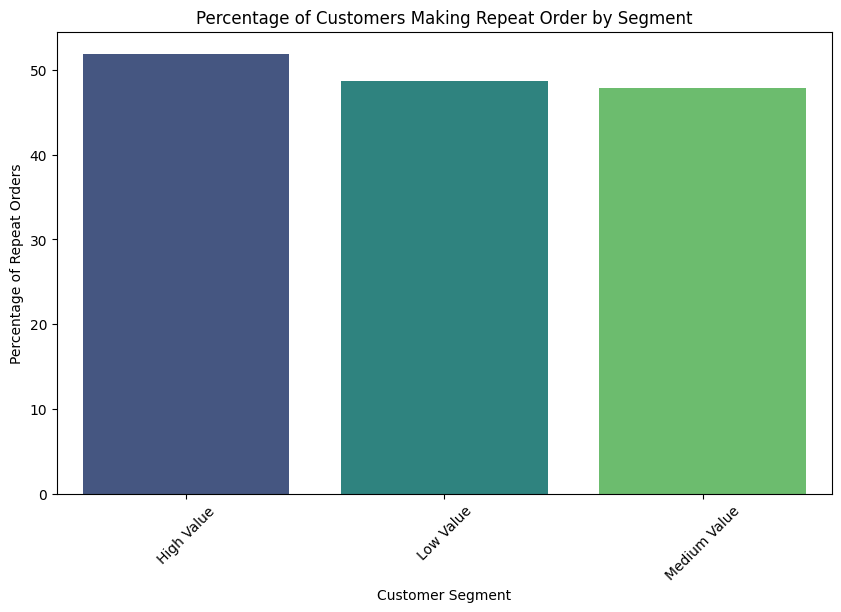

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_repeat_order_by_segment.index, y=percent_repeat_order_by_segment.values, palette="viridis")
plt.title("Percentage of Customers Making Repeat Order by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Percentage of Repeat Orders")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Segmen High Value (51.95%): Pelanggan dalam segmen ini memiliki tingkat repeat order tertinggi. Hal ini menunjukkan bahwa pelanggan yang melakukan pembelian dengan nilai pesanan yang lebih tinggi cenderung lebih loyal dan memiliki kemungkinan lebih besar untuk melakukan pemesanan ulang. Hal ini bisa jadi karena kepuasan mereka dengan produk dan layanan Tokofix, atau mungkin karena mereka sudah terbiasa membeli dalam jumlah besar atau produk premium.
2. Segmen Low Value (48.69%): Meskipun sedikit di bawah segmen High Value, pelanggan di segmen Low Value juga memiliki tingkat repeat order yang cukup baik. Pelanggan dalam kategori ini mungkin lebih sensitif terhadap harga atau penawaran promosi, yang dapat mempengaruhi keputusan mereka untuk berbelanja kembali.
3. Segmen Medium Value (47.84%): Segmen ini memiliki tingkat repeat order terendah dibandingkan dua segmen lainnya. Ini bisa mengindikasikan bahwa pelanggan di segmen ini mungkin kurang puas, atau memiliki preferensi berbelanja yang lebih variatif. Bisa jadi mereka hanya berbelanja ketika ada kebutuhan mendesak atau saat ada promosi yang menarik.

**Implikasi terhadap Strategi Bisnis:**
- Pelanggan High Value: Perlu diberikan perhatian khusus karena mereka cenderung lebih loyal. Strategi retensi seperti program loyalitas, reward eksklusif, atau pengalaman belanja premium bisa semakin meningkatkan keterlibatan mereka.
- Pelanggan Low Value dan Medium Value: Pelanggan di segmen ini bisa menjadi fokus utama untuk kampanye yang bertujuan meningkatkan repeat order, seperti memberikan insentif tambahan, rekomendasi produk yang relevan, atau penawaran harga khusus.

Dengan pemahaman ini, Tokofix bisa menyesuaikan pendekatan strategi retensi mereka berdasarkan segmentasi pelanggan dan memperbaiki pengalaman berbelanja untuk meningkatkan persentase repeat order di semua segmen.



## Soal 3

Berdasarkan data pelanggan, berapa rata-rata jumlah total pesanan yang dilakukan oleh pelanggan?



### Jawab :

In [48]:
## Rata-rata jumlah total pesanan
average_total_order = df["Total_Orders"].mean()
average_total_order

4.898

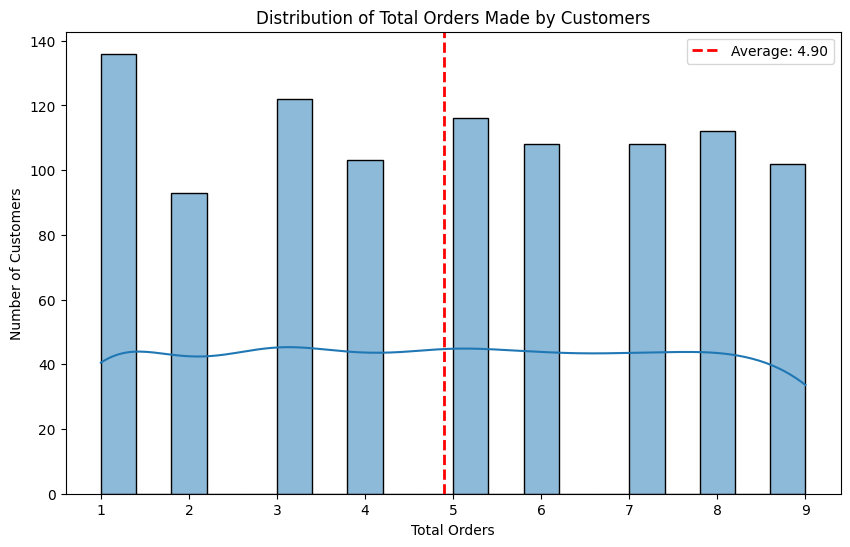

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Total_Orders"], bins=20, kde=True)
plt.axvline(average_total_order, color="red", linestyle='--', linewidth=2, label=f"Average: {average_total_order:.2f}")
plt.title("Distribution of Total Orders Made by Customers")
plt.xlabel("Total Orders")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

### Analisis :

1. Distribusi Pesanan: Histogram menunjukkan sebaran jumlah pesanan yang dilakukan oleh pelanggan. Mayoritas pelanggan memiliki total pesanan yang berkisar antara 3 hingga 6 pesanan, menunjukkan bahwa sebagian besar pelanggan memiliki aktivitas pembelian yang cukup konsisten. Distribusi ini relatif simetris dengan puncak sekitar 4–5 pesanan.
2. Nilai Rata-Rata Pesanan (4.9 Pesanan): Nilai rata-rata ini memberikan gambaran umum bahwa pelanggan Tokofix, secara keseluruhan, cenderung melakukan hampir 5 pesanan sepanjang periode yang dianalisis. Dalam konteks bisnis e-commerce, angka ini menunjukkan frekuensi pembelian yang cukup baik, di mana pelanggan cenderung kembali berbelanja setelah melakukan pesanan pertama.
3. Pelanggan dengan Pesanan Lebih Tinggi dan Lebih Rendah:
  - Ada sebagian pelanggan yang memiliki jumlah pesanan lebih rendah dari rata-rata (di bawah 4 pesanan). Ini mungkin mengindikasikan pelanggan yang hanya berbelanja sekali atau beberapa kali dan tidak kembali lagi. Pelanggan ini bisa berpotensi churn, sehingga strategi khusus untuk meningkatkan retensi bisa diterapkan pada kelompok ini.
  - Ada juga pelanggan dengan jumlah pesanan yang lebih tinggi dari rata-rata, yang mungkin mencerminkan pelanggan setia atau heavy buyers. Kelompok ini penting karena mereka memberikan kontribusi lebih besar terhadap penjualan dan sebaiknya dipertahankan melalui program loyalitas atau penawaran eksklusif.
4. Potensi Segmentasi dan Strategi Retensi:
  - Berdasarkan distribusi ini, Tokofix bisa mempertimbangkan untuk membagi pelanggan ke dalam beberapa kelompok berdasarkan frekuensi pembelian, seperti pelanggan baru (1–2 pesanan), pelanggan aktif (3–5 pesanan), dan pelanggan setia (lebih dari 6 pesanan).
  - Setiap kelompok dapat diperlakukan dengan strategi yang berbeda. Misalnya, pelanggan baru dapat diberikan promosi untuk mendorong repeat order, sementara pelanggan setia dapat dihadiahi dengan program loyalitas yang lebih menarik.

Secara keseluruhan, distribusi jumlah pesanan ini memberikan gambaran yang jelas tentang perilaku pembelian pelanggan dan dapat menjadi dasar dalam merancang strategi retensi dan promosi yang lebih efektif.


## Soal 4

Bagaimana distribusi segmen pelanggan berdasarkan nilai mereka?


### Jawab :

In [50]:
percent_order_by_value = df["Customer_Segment"].value_counts(normalize=True) * 100
percent_order_by_value

,proportion
Customer_Segment,
Low Value,34.3
High Value,33.3
Medium Value,32.4


<ipython-input-51-46b783d89bac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_order_by_value.index, y=percent_order_by_value.values, palette="viridis")


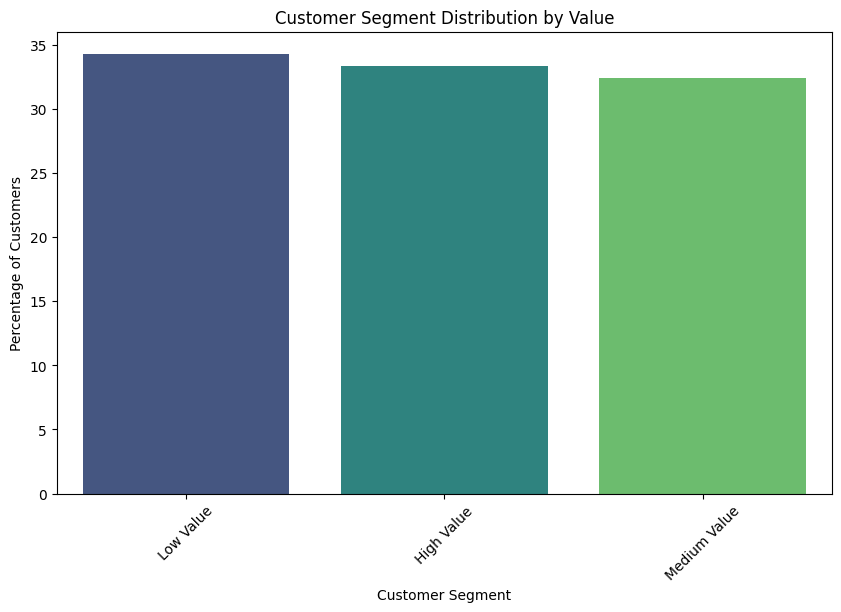

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_order_by_value.index, y=percent_order_by_value.values, palette="viridis")
plt.title("Customer Segment Distribution by Value")
plt.xlabel("Customer Segment")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Distribusi yang Seimbang: Ketiga segmen pelanggan—Low Value, Medium Value, dan High Value—memiliki distribusi yang hampir merata. Masing-masing segmen menyumbang sekitar sepertiga dari total populasi pelanggan, dengan segmen Low Value sedikit lebih dominan (34.3%), diikuti oleh High Value (33.3%), dan Medium Value (32.4%).
2. Segmen Low Value sebagai Basis Pelanggan yang Lebih Besar: Segmen Low Value yang mendominasi sedikit lebih banyak dibandingkan segmen lainnya menunjukkan bahwa Tokofix memiliki basis pelanggan yang mungkin lebih price-sensitive atau sering berbelanja produk dengan harga lebih rendah. Kelompok ini bisa dijadikan sasaran untuk meningkatkan frekuensi belanja atau mendorong mereka ke segmen yang lebih tinggi dengan menawarkan paket bundling, diskon untuk pembelian lebih besar, atau produk-produk dengan nilai tambah yang lebih tinggi.
3. Peluang Pertumbuhan di Segmen Medium dan High Value: Meski segmen High Value juga memiliki persentase yang tinggi (33.3%), Tokofix memiliki peluang untuk lebih mendorong pertumbuhan di segmen ini, terutama dengan program yang memotivasi pelanggan untuk meningkatkan nilai pesanan mereka. Pelanggan High Value cenderung lebih loyal dan memberikan kontribusi penjualan yang lebih signifikan, sehingga mereka adalah kelompok yang berharga untuk dipertahankan dan dikembangkan.
4. Pentingnya Menyeimbangkan Pendekatan untuk Setiap Segmen: Karena distribusi antara segmen cukup merata, Tokofix perlu mempertimbangkan pendekatan yang berbeda untuk setiap segmen:
  - Low Value: Meningkatkan keterlibatan dengan diskon atau promosi yang mendorong repeat order.
  - Medium Value: Menawarkan insentif untuk meningkatkan pesanan atau frekuensi belanja agar mereka naik ke segmen High Value.
  - High Value: Fokus pada retensi dan loyalitas, serta menawarkan pengalaman yang lebih personal, eksklusif, atau reward yang sesuai dengan pembelanjaan mereka.

**Implikasi Strategis:**
- Peningkatan Retensi: Dengan distribusi yang merata, Tokofix bisa merancang strategi retensi dan promosi yang lebih tepat sasaran untuk setiap segmen.
- Meningkatkan Nilai Pesanan: Mendorong pelanggan dari segmen Low dan Medium Value untuk melakukan pembelian lebih besar bisa meningkatkan pendapatan secara signifikan.
- Fokus pada Pelanggan High Value: Mengingat segmen High Value menyumbang sepertiga pelanggan, fokus pada program loyalitas khusus untuk mempertahankan mereka adalah kunci untuk pertumbuhan jangka panjang.

Secara keseluruhan, distribusi yang seimbang ini memberikan peluang untuk memperkuat pendekatan bisnis yang spesifik terhadap setiap segmen pelanggan, sehingga dapat meningkatkan retensi, loyalitas, dan nilai pesanan secara keseluruhan.



## Soal 5

Dari kota mana saja asal pelanggan dalam dataset ini, dan bagaimana distribusinya?



### Jawab :

In [52]:
percent_order_by_city = df["Customer_Region"].value_counts(normalize=True) * 100
percent_order_by_city

,proportion
Customer_Region,
Yogyakarta,21.7
Medan,20.0
Bandung,19.8
Surabaya,19.8
Jakarta,18.7


<ipython-input-53-7ee42ba4d4ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_order_by_city.index, y=percent_order_by_city.values, palette="viridis")


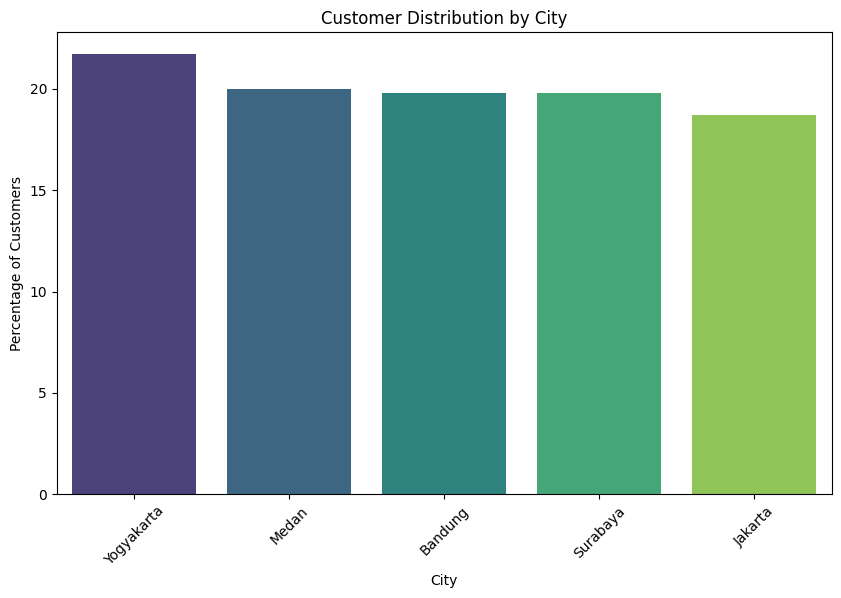

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_order_by_city.index, y=percent_order_by_city.values, palette="viridis")
plt.title("Customer Distribution by City")
plt.xlabel("City")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Distribusi yang Relatif Merata di  Lima Kota Utama
  - Yogyakarta: 21.7%
  - Medan: 20.0%
  - Bandung: 19.8%
  - Surabaya: 19.8%
  - Jakarta: 18.7%

Kelima kota ini menyumbang persentase yang hampir sama dalam distribusi pelanggan, dengan Yogyakarta sedikit lebih dominan dibandingkan kota lainnya. Kota dengan jumlah pelanggan terkecil dalam dataset ini adalah Jakarta (18.7%), namun perbedaannya tidak terlalu signifikan dibandingkan kota lain.

2. Peluang Strategis Berdasarkan Geografi
  - Yogyakarta sebagai kota dengan persentase pelanggan terbesar mengindikasikan adanya potensi pasar yang kuat di sana. Tokofix bisa mempertimbangkan untuk fokus pada strategi retensi dan ekspansi di Yogyakarta, seperti menyesuaikan produk dengan preferensi lokal atau mengadakan kampanye pemasaran yang lebih kuat di daerah ini.
  - Medan, Bandung, dan Surabaya juga menunjukkan potensi pasar yang besar, karena persentase pelanggan di ketiga kota ini hampir sama. Tokofix bisa memprioritaskan strategi pemasaran atau promosi di kota-kota ini untuk memperluas basis pelanggan dan meningkatkan retensi.
  - Jakarta meskipun berada di urutan terakhir dalam hal distribusi pelanggan, tetap merupakan pasar penting karena ukuran populasi dan potensi daya beli yang besar. Tokofix dapat memanfaatkan pendekatan yang lebih agresif untuk menarik pelanggan baru atau menguatkan penetrasi pasar di Jakarta.

3. Potensi Kebutuhan Berbeda di Setiap Kota
Setiap kota mungkin memiliki karakteristik pelanggan yang berbeda. Sebagai contoh:
  - Yogyakarta dikenal dengan komunitas yang lebih akademis dan mahasiswa, sehingga promosi produk dengan harga yang lebih terjangkau bisa lebih efektif.
  - Medan dan Surabaya, sebagai pusat bisnis di luar Jawa, bisa lebih tertarik pada produk yang memiliki fokus pada kebutuhan sehari-hari dan gaya hidup urban.
  - Bandung yang terkenal dengan komunitas kreatif dan mode, mungkin memerlukan pendekatan produk yang lebih inovatif atau estetis.
  - Jakarta, sebagai ibu kota, menawarkan peluang untuk produk premium dan layanan pengiriman cepat.

4. Pengaruh Geografi terhadap Logistik dan Operasional

Dengan distribusi pelanggan yang cukup merata di berbagai kota besar, Tokofix perlu mempertimbangkan efisiensi logistik dan biaya pengiriman. Kota-kota seperti Medan dan Surabaya yang berada di luar Pulau Jawa mungkin memerlukan strategi khusus terkait waktu pengiriman, ketersediaan stok lokal, atau penawaran pengiriman gratis untuk menjaga kepuasan pelanggan dan meningkatkan retensi.

5. Target Promosi dan Penetrasi

Data ini dapat membantu Tokofix dalam mengarahkan strategi pemasaran berdasarkan kota:
  - Di Yogyakarta yang sudah memiliki basis pelanggan besar, fokus bisa diarahkan pada retensi dan loyalitas, misalnya melalui penawaran diskon untuk pelanggan setia atau event lokal.
  - Di Jakarta, di mana pangsa pasar sedikit lebih kecil, upaya promosi bisa difokuskan untuk meningkatkan akuisisi pelanggan baru melalui kampanye digital atau kolaborasi dengan influencer lokal.

**Kesimpulan**

Distribusi pelanggan Tokofix di lima kota utama menunjukkan peluang besar untuk memperluas pasar dan menyesuaikan strategi pemasaran, logistik, dan produk sesuai dengan karakteristik masing-masing kota. Yogyakarta memiliki potensi terbesar saat ini, namun kota-kota lain seperti Medan, Bandung, Surabaya, dan Jakarta juga memberikan peluang signifikan untuk pertumbuhan bisnis di masa mendatang.


## Soal 6

Bagaimana distribusi risiko churn pada pelanggan?


### Jawab :

In [54]:
percent_order_by_churn = df["Churn_Risk"].value_counts(normalize=True) * 100
percent_order_by_churn

,proportion
Churn_Risk,
High,33.6
Medium,33.2
Low,33.2


<ipython-input-55-aa0d152107a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_order_by_churn.index, y=percent_order_by_churn.values, palette="viridis")


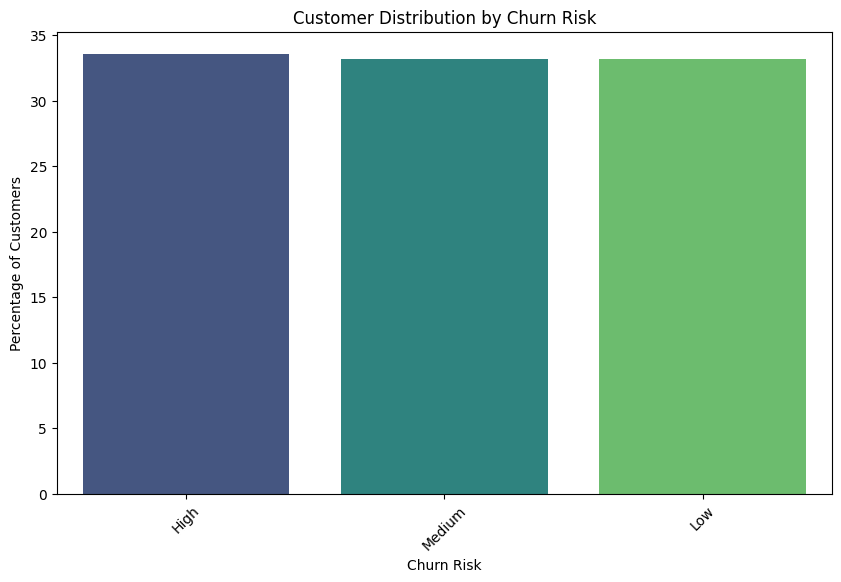

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_order_by_churn.index, y=percent_order_by_churn.values, palette="viridis")
plt.title("Customer Distribution by Churn Risk")
plt.xlabel("Churn Risk")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Distribusi yang Merata Antara Kategori Risiko
  - Risiko Tinggi (33.6%): Lebih dari sepertiga pelanggan berada dalam kategori risiko tinggi untuk berhenti berbelanja. Pelanggan ini mungkin sudah menunjukkan tanda-tanda penurunan keterlibatan atau kepuasan, sehingga perlu diwaspadai. Kelompok ini adalah prioritas utama untuk strategi retensi.
  - Risiko Sedang (33.2%): Hampir sepertiga pelanggan berada dalam kategori risiko sedang. Pelanggan ini masih memiliki peluang untuk tetap setia, namun mungkin memerlukan dorongan tambahan agar tidak beralih ke kategori risiko tinggi.
  - Risiko Rendah (33.2%): Sepertiga pelanggan masuk dalam kategori risiko rendah, artinya mereka masih terlibat aktif dengan platform Tokofix. Ini adalah pelanggan yang penting untuk dipertahankan melalui program loyalitas atau pengalaman berbelanja yang lebih baik.

2. Peluang Intervensi untuk Menurunkan Churn
  - Pelanggan Risiko Tinggi: Sebagai kelompok dengan risiko paling besar untuk churn, pelanggan ini membutuhkan perhatian khusus. Tokofix bisa melakukan beberapa hal untuk menurunkan churn di kelompok ini, seperti memberikan diskon atau promosi eksklusif, mengirimkan pengingat produk, atau mengoptimalkan layanan pelanggan untuk menangani keluhan mereka.
  - Pelanggan Risiko Sedang: Untuk pelanggan dengan risiko sedang, strategi yang lebih ringan dapat diterapkan, misalnya dengan menargetkan mereka menggunakan email marketing, menawarkan rekomendasi produk yang sesuai, atau memberikan insentif kecil seperti poin reward. Tujuannya adalah untuk memastikan mereka tetap terlibat dan tidak pindah ke risiko tinggi.
  - Pelanggan Risiko Rendah: Meskipun pelanggan dengan risiko rendah cenderung lebih loyal, mereka tetap perlu diberi perhatian agar tidak mengalami penurunan dalam keterlibatan. Program loyalitas yang menarik, hadiah untuk pelanggan setia, atau pengalaman berbelanja yang lebih dipersonalisasi dapat membantu menjaga mereka tetap setia dalam jangka panjang.

3. Implikasi Strategi Retensi
  - Segmentasi Berdasarkan Risiko Churn: Dengan distribusi yang merata di semua kategori risiko, Tokofix bisa merancang strategi retensi yang berbeda untuk setiap segmen. Untuk pelanggan dengan risiko tinggi, upaya intervensi harus lebih agresif dan tepat waktu. Sedangkan pelanggan dengan risiko rendah bisa menjadi prioritas untuk program loyalitas dan pengembangan nilai lifetime mereka.
  - Monitoring dan Pemeliharaan Pelanggan: Analisis churn ini juga menunjukkan bahwa perlu adanya sistem pemantauan yang terus menerus terhadap keterlibatan pelanggan. Dengan mengetahui kapan pelanggan mulai berkurang aktivitasnya, Tokofix bisa melakukan upaya proaktif untuk mencegah mereka berpindah ke kompetitor.

4. Keseimbangan Risiko dalam Basis Pelanggan
  - Distribusi yang merata antara risiko tinggi, sedang, dan rendah menunjukkan bahwa Tokofix memiliki tantangan dan peluang yang sama di setiap segmen. Hal ini bisa membantu dalam merencanakan alokasi sumber daya perusahaan secara lebih efisien, baik untuk mengurangi churn di kelompok risiko tinggi maupun meningkatkan retensi di kelompok risiko rendah.

**Kesimpulan**
Dengan sepertiga pelanggan berada dalam kategori risiko tinggi, Tokofix harus segera mengambil tindakan untuk menurunkan churn, terutama dengan menawarkan insentif atau solusi yang dapat membuat mereka tetap loyal. Sementara itu, pelanggan dengan risiko sedang dan rendah juga perlu dikelola dengan baik untuk menjaga keseimbangan dan mencegah mereka bergeser ke kategori risiko yang lebih tinggi. Strategi retensi yang tepat sasaran, dengan fokus yang berbeda untuk setiap segmen risiko, dapat membantu Tokofix mempertahankan pelanggan dan meningkatkan engagement jangka panjang.



## Soal 7

Bagaimana distribusi risiko churn di setiap wilayah pelanggan?


### Jawab :

In [56]:
percent_churn_risk_by_city = df.groupby("Customer_Region")["Churn_Risk"].value_counts(normalize=True) * 100
percent_churn_risk_by_city

Customer_Region  Churn_Risk
Bandung          Low           34.343434
                 High          32.828283
                 Medium        32.828283
Jakarta          Low           37.967914
                 High          31.550802
                 Medium        30.481283
Medan            Medium        36.000000
                 Low           33.500000
                 High          30.500000
Surabaya         High          34.343434
                 Medium        33.838384
                 Low           31.818182
Yogyakarta       High          38.248848
                 Medium        32.718894
                 Low           29.032258
Name: proportion, dtype: float64

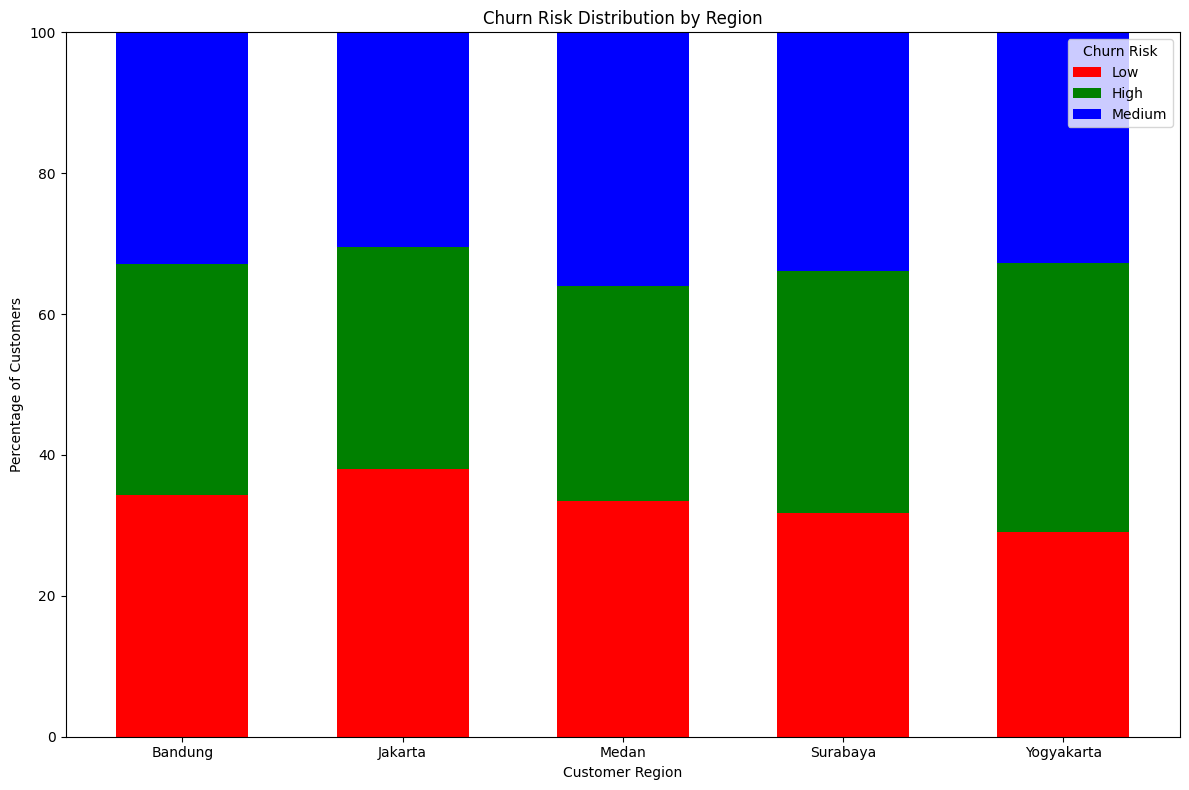

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ["Red","Green","Blue"]
churn_risk_categories = percent_churn_risk_by_city.index.get_level_values(1).unique()

# Membuat grafik batang bertumpuk
for i, region in enumerate(percent_churn_risk_by_city.index.get_level_values(0).unique()):
    region_data = percent_churn_risk_by_city.xs(region, level=0)  # Data untuk region tertentu
    bottom = np.zeros(len(region_data.index))  # Awal tumpukan adalah nol

    # Menambahkan batang bertumpuk untuk setiap kategori risiko churn
    for j, churn_risk in enumerate(churn_risk_categories):
        ax.bar(
            region,
            region_data.loc[churn_risk],
            width=0.6,
            bottom=bottom,
            label=churn_risk if i == 0 else "",  # Label hanya ditampilkan sekali
            color=colors[j % len(colors)],
        )
        bottom += region_data.loc[churn_risk]  # Update posisi tumpukan

# Menambahkan detail pada plot
ax.set_xlabel("Customer Region")
ax.set_ylabel("Percentage of Customers")
ax.set_title("Churn Risk Distribution by Region")
ax.set_ylim(0, 100)  # Persentase maksimum adalah 100%
ax.legend(title="Churn Risk")

# Menampilkan plot
plt.tight_layout()
plt.show()

### Analisis :

1. Yogyakarta (Risiko Tinggi Tertinggi - 38.2%)
  - Pelanggan dengan Risiko Tinggi di Yogyakarta mencapai 38.2%, yang merupakan persentase tertinggi dibandingkan wilayah lain. Ini menandakan bahwa pelanggan di Yogyakarta memiliki kemungkinan lebih tinggi untuk churn (berhenti berbelanja di Tokofix).
  - Risiko Rendah di Yogyakarta hanya 29%, lebih rendah dibandingkan kota lain. Hal ini mengindikasikan bahwa banyak pelanggan di Yogyakarta yang mungkin sudah tidak terlalu aktif atau mengalami penurunan kepuasan.

Strategi Retensi: Tokofix bisa fokus pada program retensi yang lebih agresif di Yogyakarta, seperti penawaran eksklusif, diskon khusus, atau personalisasi produk yang lebih sesuai dengan preferensi lokal.

2. Jakarta (Risiko Rendah Tertinggi - 38.0%)
  - Pelanggan dengan Risiko Rendah di Jakarta berada pada level tertinggi (38.0%), menandakan bahwa pelanggan di kota ini cenderung lebih setia dan memiliki keterlibatan yang lebih baik dengan Tokofix.
  - Hanya 31.6% dari pelanggan Jakarta yang berada dalam kategori Risiko Tinggi, yang merupakan salah satu angka terendah di antara semua wilayah.

Strategi Pengembangan: Pelanggan di Jakarta bisa menjadi target untuk meningkatkan pembelian melalui program loyalitas atau upselling, karena mereka sudah memiliki keterlibatan yang kuat dengan platform.

3. Medan (Risiko Sedang Tertinggi - 36.0%)
  - Risiko Sedang di Medan mencapai 36.0%, yang menunjukkan bahwa pelanggan di Medan berada dalam situasi ambang; mereka masih bisa dipertahankan dengan strategi retensi yang tepat. Pelanggan ini mungkin memerlukan sedikit dorongan untuk meningkatkan keterlibatan mereka.
  - Risiko Tinggi di Medan (30.5%) relatif lebih rendah dibandingkan wilayah lainnya.

Strategi Peningkatan Keterlibatan: Pelanggan di Medan mungkin membutuhkan insentif seperti promosi atau pengingat produk untuk meningkatkan frekuensi pembelian mereka agar tidak jatuh ke kategori risiko tinggi.

4. Surabaya (Risiko Tinggi Kedua - 34.3%)
  - Surabaya memiliki persentase Risiko Tinggi kedua terbesar (34.3%), menunjukkan bahwa cukup banyak pelanggan yang berisiko churn. Pelanggan di Surabaya cenderung memiliki keterlibatan yang lebih lemah, serupa dengan Yogyakarta.

Strategi Retensi: Seperti Yogyakarta, Surabaya perlu mendapatkan perhatian lebih melalui promosi khusus dan kampanye yang lebih intensif untuk menurunkan angka risiko churn.

5. Bandung (Distribusi Merata)
  - Distribusi risiko churn di Bandung sangat merata, dengan Risiko Tinggi dan Risiko Sedang masing-masing sebesar 32.8%, dan Risiko Rendah sebesar 34.3%. Ini menandakan bahwa pelanggan di Bandung cenderung terbagi rata dalam ketiga kategori risiko.

Strategi Berimbang: Karena distribusi yang merata, Tokofix bisa menggunakan pendekatan retensi yang seimbang untuk pelanggan di Bandung. Pelanggan dengan risiko rendah bisa menjadi target untuk program loyalitas, sedangkan pelanggan risiko tinggi memerlukan pendekatan lebih mendalam untuk mempertahankan mereka.

**Kesimpulan Umum**
1. Fokus Retensi di Yogyakarta dan Surabaya: Kedua kota ini memiliki persentase pelanggan dengan risiko tinggi yang signifikan, dan strategi retensi agresif seperti penawaran eksklusif atau personalisasi layanan bisa membantu menurunkan risiko churn di sana.
2. Peluang di Jakarta: Pelanggan di Jakarta memiliki keterlibatan yang kuat, sehingga program loyalitas dan upselling bisa menjadi cara yang efektif untuk meningkatkan nilai lifetime pelanggan di wilayah ini.
3. Medan dengan Peluang Peningkatan: Pelanggan di Medan memerlukan strategi untuk meningkatkan keterlibatan sebelum mereka bergeser ke risiko tinggi.
4. Pendekatan Berimbang di Bandung: Kota ini memerlukan strategi retensi yang merata, baik untuk mempertahankan pelanggan risiko rendah maupun untuk mengurangi risiko tinggi.

Distribusi risiko churn ini menunjukkan bahwa Tokofix dapat merancang strategi retensi yang lebih berbasis wilayah, dengan fokus berbeda tergantung pada karakteristik risiko churn di masing-masing kota.







## Soal 8

Bagaimana risiko churn memengaruhi kecenderungan pelanggan untuk melakukan repeat order?


### Jawab :

In [58]:
percent_of_repeat_order_by_churn = df.groupby("Churn_Risk")["Is_Repeat_Order_Next_Month"].mean() * 100
percent_of_repeat_order_by_churn

,Is_Repeat_Order_Next_Month
Churn_Risk,
High,50.595238
Low,50.602410
Medium,47.289157


<ipython-input-59-b96e02985368>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_of_repeat_order_by_churn.index, y=percent_of_repeat_order_by_churn.values, palette="viridis")


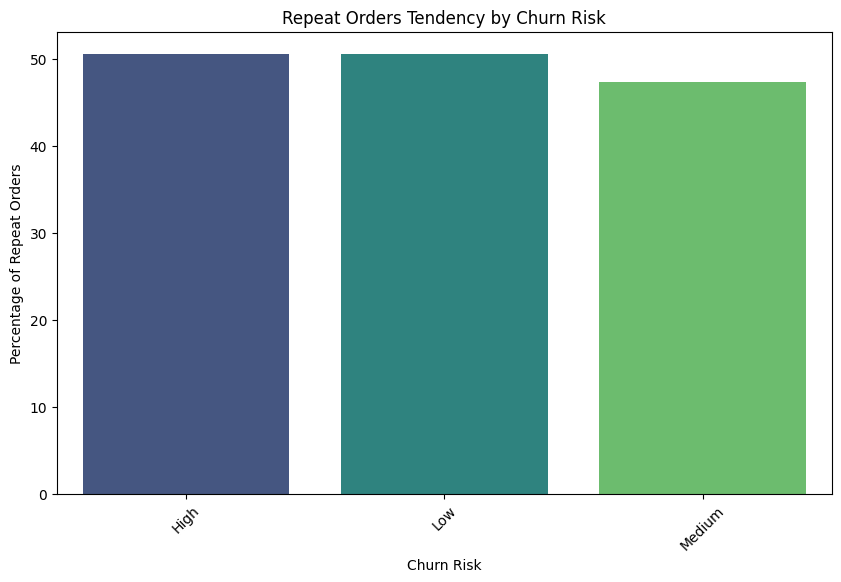

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_of_repeat_order_by_churn.index, y=percent_of_repeat_order_by_churn.values, palette="viridis")
plt.title("Repeat Orders Tendency by Churn Risk")
plt.xlabel("Churn Risk")
plt.ylabel("Percentage of Repeat Orders")
plt.xticks(rotation=45)
plt.show()

### Analisis :

- Risiko Tinggi (High Risk): 50.6% pelanggan dengan risiko tinggi melakukan repeat order di bulan berikutnya.
- Risiko Rendah (Low Risk): 50.6% pelanggan dengan risiko rendah juga melakukan repeat order.
- Risiko Sedang (Medium Risk): 47.3% pelanggan dengan risiko sedang melakukan repeat order.

**Temuan Utama:**
- Pelanggan dengan risiko tinggi dan rendah memiliki persentase repeat order yang hampir sama, sekitar 50.6%. Ini mengindikasikan bahwa meskipun pelanggan risiko tinggi cenderung lebih mungkin churn, setengah dari mereka masih melakukan repeat order.
- Pelanggan dengan risiko sedang memiliki tingkat repeat order yang lebih rendah (47.3%), menunjukkan bahwa mereka lebih cenderung berada dalam kondisi tidak pasti terkait komitmen mereka terhadap platform.

**Implikasi:**

Risiko churn memang memengaruhi kecenderungan repeat order, tetapi pelanggan dengan risiko tinggi dan rendah masih memiliki peluang yang sama untuk melakukan repeat order. Tokofix perlu memastikan bahwa pelanggan risiko tinggi mendapatkan insentif lebih besar untuk mendorong mereka tetap berbelanja dan mengurangi potensi churn.



## Soal 9

Wilayah mana yang memiliki persentase pelanggan tertinggi yang melakukan repeat order?

###Jawab :

In [60]:
percent_of_customers_making_repeat_order_by_region = df.groupby("Customer_Region")["Is_Repeat_Order_Next_Month"].mean() * 100
percent_of_customers_making_repeat_order_by_region

,Is_Repeat_Order_Next_Month
Customer_Region,
Bandung,50.000000
Jakarta,48.663102
Medan,54.500000
Surabaya,44.949495
Yogyakarta,49.308756


<ipython-input-61-6a8b5ed81cfc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_of_customers_making_repeat_order_by_region.index, y=percent_of_customers_making_repeat_order_by_region.values, palette="viridis")


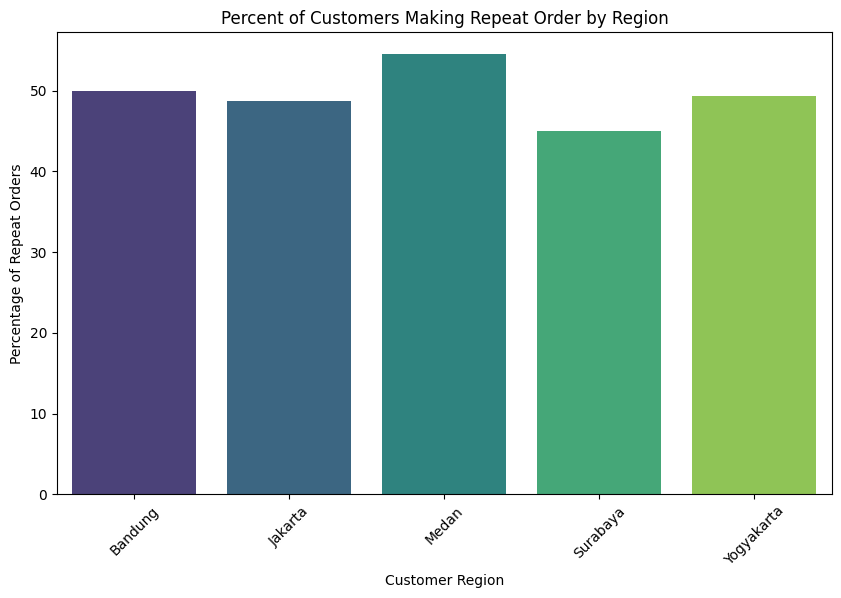

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_of_customers_making_repeat_order_by_region.index, y=percent_of_customers_making_repeat_order_by_region.values, palette="viridis")
plt.title("Percent of Customers Making Repeat Order by Region")
plt.xlabel("Customer Region")
plt.ylabel("Percentage of Repeat Orders")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Medan - Persentase Repeat Order Tertinggi (54.5%)
  - Medan menunjukkan tingkat loyalitas pelanggan yang paling tinggi. Lebih dari setengah pelanggan di Medan melakukan repeat order di bulan berikutnya setelah pembelian pertama. Hal ini menunjukkan bahwa Tokofix mungkin telah berhasil menciptakan pengalaman berbelanja yang baik di Medan, atau produk yang ditawarkan sangat relevan dengan kebutuhan pasar di sana.
  - Ini bisa menjadi indikasi bahwa strategi pemasaran atau promosi di Medan sangat efektif, dan Tokofix dapat mempertimbangkan untuk memperkuat kehadiran di Medan dengan lebih banyak penawaran yang dipersonalisasi, program loyalitas, atau peningkatan layanan pelanggan.

2. Bandung - Repeat Order yang Baik (50.0%)
  - Di Bandung, 50% pelanggan melakukan repeat order. Ini adalah sinyal yang baik tentang keterlibatan pelanggan di wilayah ini. Bandung dikenal sebagai kota dengan komunitas yang kreatif dan dinamis, sehingga strategi yang relevan dengan tren lokal dan preferensi pelanggan di Bandung mungkin telah berhasil.
  - Bandung bisa menjadi target penting untuk mempertahankan momentum ini dengan penawaran yang lebih inovatif atau promosi yang disesuaikan dengan preferensi lokal.

3. Yogyakarta - Pelanggan yang Terlibat (49.3%)
  - Yogyakarta memiliki tingkat repeat order yang cukup tinggi, yakni 49.3%. Meskipun ini sedikit di bawah Bandung, hal ini menunjukkan bahwa pelanggan di Yogyakarta masih cenderung berbelanja kembali setelah pembelian pertama. Mengingat Yogyakarta adalah kota dengan persentase pelanggan High Risk yang lebih besar, angka repeat order ini cukup positif.
  - Tokofix bisa fokus untuk mempertahankan pelanggan di Yogyakarta dengan program yang meningkatkan loyalitas dan pengalaman berbelanja, seperti diskon khusus atau program rewards.

4. Jakarta - Pelanggan yang Stabil (48.7%)
  - Jakarta, sebagai ibu kota dan salah satu pasar terbesar, memiliki tingkat repeat order 48.7%. Ini cukup baik mengingat kompetisi di Jakarta biasanya lebih ketat dibandingkan kota-kota lainnya.
  - Meski demikian, ada potensi untuk meningkatkan loyalitas lebih lanjut dengan memberikan pengalaman pelanggan yang lebih terpersonalisasi, mengingat Jakarta memiliki persentase pelanggan risiko rendah yang tinggi.

5. Surabaya - Repeat Order Terendah (44.9%)
  - Surabaya memiliki persentase repeat order terendah, yaitu 44.9%. Hal ini mungkin menandakan adanya beberapa masalah dalam pengalaman pelanggan atau kebutuhan yang belum sepenuhnya terpenuhi. Bisa jadi, pelanggan di Surabaya menghadapi tantangan terkait produk, harga, atau layanan.
  - Tokofix bisa menjadikan Surabaya sebagai fokus dalam perbaikan strategi retensi pelanggan, mungkin melalui survei kepuasan pelanggan, peningkatan layanan pengiriman, atau penawaran eksklusif yang lebih relevan bagi pasar lokal.

**Implikasi untuk Strategi Bisnis:**
1. Fokus pada Medan dan Bandung: Kedua wilayah ini menunjukkan performa yang sangat baik dalam hal repeat order. Tokofix bisa memanfaatkan momentum ini dengan terus meningkatkan program loyalitas dan promosi yang berkelanjutan. Mengingat keterlibatan pelanggan yang tinggi, pengembangan lebih lanjut di wilayah ini bisa menghasilkan pelanggan setia jangka panjang.
2. Tingkatkan Engagement di Surabaya: Surabaya, dengan persentase repeat order terendah, menunjukkan potensi risiko churn yang lebih tinggi. Perlu dilakukan evaluasi lebih lanjut untuk memahami apa yang membuat pelanggan di wilayah ini kurang terlibat dan apa yang bisa ditingkatkan dari sisi produk, harga, atau layanan.
3. Optimalkan Pengalaman di Jakarta dan Yogyakarta: Meskipun performa repeat order di dua kota ini cukup baik, ada peluang untuk meningkatkan loyalitas pelanggan lebih jauh. Penawaran yang lebih personal dan promosi yang disesuaikan dengan preferensi lokal bisa membantu meningkatkan keterlibatan di kedua kota ini.

**Kesimpulan:**
- Medan memiliki tingkat repeat order tertinggi, menunjukkan potensi loyalitas yang sangat baik.
- Bandung dan Yogyakarta juga menunjukkan keterlibatan pelanggan yang tinggi.
- Surabaya menjadi area dengan tingkat repeat order terendah dan membutuhkan strategi khusus untuk meningkatkan loyalitas.
- Jakarta tetap menjadi pasar penting dengan pelanggan yang stabil, namun memiliki peluang untuk peningkatan lebih lanjut.

Tokofix bisa menyusun strategi retensi yang disesuaikan dengan karakteristik setiap wilayah, memperkuat keunggulan di wilayah yang sudah menunjukkan keterlibatan tinggi, dan memperbaiki pengalaman di wilayah yang memiliki potensi churn lebih tinggi.






## Soal 10

Bagaimana hubungan antara segmen pelanggan dan nilai rata-rata pesanan mereka?


### Jawab :

In [62]:
# Convert 'Average_Order_Value' to numeric, removing non-numeric characters
df["Average_Order_Value"] = pd.to_numeric(df["Average_Order_Value"].str.replace('[^0-9.]', '', regex=True), errors='coerce')

avg_order_value_by_segment = df.groupby("Customer_Segment")["Average_Order_Value"].mean()
avg_order_value_by_segment

,Average_Order_Value
Customer_Segment,
High Value,547.207447
Low Value,549.919009
Medium Value,562.567469


<ipython-input-63-d2a80b9e571a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value_by_segment.index, y=avg_order_value_by_segment.values, palette="viridis")


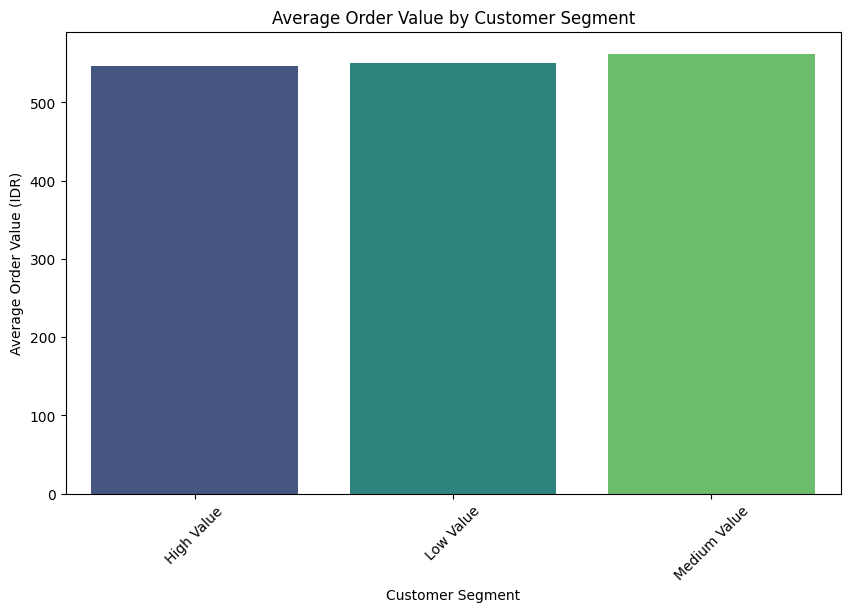

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_order_value_by_segment.index, y=avg_order_value_by_segment.values, palette="viridis")
plt.title("Average Order Value by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Order Value (IDR)")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Segmen Medium Value Memiliki Rata-Rata Pesanan Tertinggi (Rp562,567)
  - Segmen Medium Value menunjukkan rata-rata nilai pesanan tertinggi di antara semua segmen. Hal ini mungkin menandakan bahwa pelanggan dalam kategori ini sering melakukan pembelian dengan jumlah yang sedikit lebih tinggi dibandingkan segmen lainnya, meskipun mereka tidak berada di kategori High Value.
  - Medium Value mungkin mencerminkan pelanggan yang berada di titik keseimbangan antara volume pesanan dan harga produk yang mereka beli. Mereka cenderung memilih produk dengan harga menengah hingga tinggi, tetapi frekuensi pembelian mereka mungkin tidak setinggi segmen High Value.

2. Segmen High Value dan Low Value Memiliki Rata-Rata Pesanan yang Mirip
  - High Value (Rp547,207) dan Low Value (Rp549,919) memiliki rata-rata pesanan yang hampir sama, meskipun total nilai pesanan mereka secara keseluruhan berbeda. Ini menunjukkan bahwa meskipun segmen High Value secara total memiliki pesanan lebih besar, nilai per transaksi mereka mirip dengan pelanggan Low Value.
  - Perbedaan antara segmen High Value dan Low Value lebih terletak pada frekuensi pembelian atau akumulasi total pesanan. High Value mungkin melakukan lebih banyak pesanan atau membeli produk dalam jumlah yang lebih besar, tetapi nilai per transaksi mereka tidak berbeda jauh dengan pelanggan Low Value.

3. Kecenderungan Pembelian Berdasarkan Segmen
  - Segmen Medium Value: Pelanggan dalam segmen ini cenderung memilih produk dengan nilai yang sedikit lebih tinggi daripada segmen lain. Ini dapat disebabkan oleh preferensi terhadap produk dengan kualitas menengah hingga tinggi atau kebutuhan khusus yang sering mereka beli.
  - Segmen High Value: Meskipun rata-rata nilai pesanan mereka mirip dengan segmen Low Value, pelanggan dalam segmen ini mungkin lebih sering membeli produk atau memesan dalam jumlah besar, sehingga total nilai pesanan mereka lebih tinggi. Mereka bisa menjadi target utama untuk strategi loyalitas atau program reward yang mendorong pembelian lebih sering.
  - Segmen Low Value: Pelanggan dalam segmen ini cenderung melakukan pembelian dengan nilai pesanan yang sedikit lebih rendah, tetapi frekuensi pembelian mereka mungkin tidak sebesar pelanggan High Value.

4. Implikasi untuk Strategi Pemasaran dan Retensi
  - Target Promosi: Melihat bahwa nilai rata-rata pesanan antara segmen Low Value dan High Value tidak berbeda jauh, Tokofix bisa menerapkan strategi yang sama untuk meningkatkan frekuensi pembelian di kedua segmen ini. Diskon atau promosi untuk pembelian dalam jumlah lebih besar dapat menarik pelanggan Low Value dan High Value.
  - Personalized Recommendations: Untuk pelanggan Medium Value, Tokofix dapat menawarkan rekomendasi produk premium atau berkualitas tinggi, karena pelanggan di segmen ini sudah menunjukkan kecenderungan untuk membeli produk dengan nilai pesanan yang lebih tinggi.
  - Peningkatan Volume Pesanan: Segmen High Value dan Low Value dapat lebih dioptimalkan melalui strategi yang meningkatkan volume pesanan mereka, misalnya dengan memberikan diskon untuk pembelian lebih banyak atau menawarkan produk bundling.

**Kesimpulan:**
- Medium Value adalah segmen dengan nilai rata-rata pesanan tertinggi, menunjukkan preferensi mereka terhadap produk dengan harga yang sedikit lebih tinggi.
- High Value dan Low Value memiliki rata-rata pesanan yang serupa, meskipun mereka berbeda dalam total nilai pesanan. Ini menandakan bahwa perbedaan utama antar segmen bukan terletak pada nilai setiap transaksi, tetapi lebih pada frekuensi atau volume pembelian.
- Strategi yang terfokus pada peningkatan frekuensi pembelian atau menawarkan diskon untuk pembelian lebih besar dapat diterapkan untuk semua segmen, dengan penekanan lebih besar pada High Value dan Low Value.

Dengan wawasan ini, Tokofix dapat menyesuaikan strategi pemasaran dan promosi mereka untuk mendorong pembelian yang lebih besar atau lebih sering di setiap segmen pelanggan.

